In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv('dt.csv')
data.columns=['num','cust','recency','count','sum']

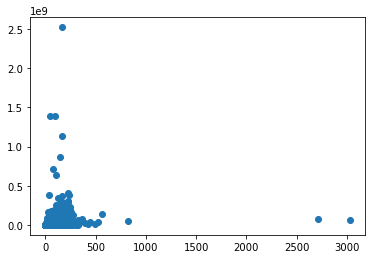

In [50]:
plt.scatter(data['count'],data['sum'])
plt.show()

C:\pythontemp\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum', ylabel='Density'>

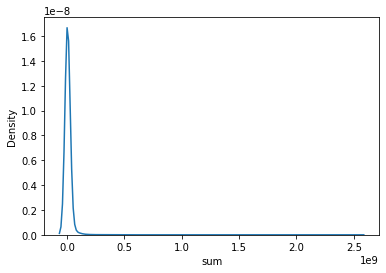

In [51]:
sns.kdeplot(data['sum'],bw=0.5)

C:\pythontemp\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

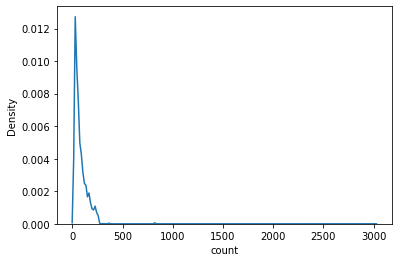

In [52]:
sns.kdeplot(data['count'],bw=0.01)

In [53]:
q3 = data.quantile(0.75) # df['sum'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = data.quantile(0.25)

iqr = q3 - q1

def is_kor_outlier(data):
    kor_score = data['sum']
    if kor_score > q3['sum'] + 3 * iqr['sum'] or kor_score < q1['sum'] - 3 * iqr['sum']:
        return True
    else:
        return False

# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
data['sum_이상치여부'] = data.apply(is_kor_outlier, axis = 1) # axis = 1 지정 필수

data

# 이상치인 행은 제거하여 필터링
df = data.loc[data['sum_이상치여부'] == False]

# 이상치여부를 나타내는 열 제거
del df['sum_이상치여부']

df

SyntaxError: invalid syntax (<ipython-input-53-edbe231c7eed>, line 8)

In [54]:
# 'count' 열에 대하여 이상치 여부를 판별해주는 함수
def is_kor_outlier(df):
    kor_score = df['count']
    if kor_score > q3['count'] + 1.5 * iqr['count'] or kor_score < q1['count'] - 1.5  * iqr['count']:
        return True
    else:
        return False

# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
df['count_이상치여부'] = df.apply(is_kor_outlier, axis = 1) # axis = 1 지정 필수

df

df_trim = df.loc[df['count_이상치여부'] == False]

# 이상치여부를 나타내는 열 제거
del df_trim['count_이상치여부']

df_trim

,num,cust,recency,count,sum
1,1,M000419293,20211124,39,1926900.0
3,3,M000557840,20211225,49,2332838.0
4,4,M000871427,20211218,53,2183060.0
5,5,M000986912,20211221,48,1377870.0
6,6,M001248380,20211206,38,992100.0
...,...,...,...,...,...
8571,8571,M999227380,20211231,32,3449170.0
8572,8572,M999268192,20211206,24,783100.0
8573,8573,M999599111,20211114,8,1550082.0
8574,8574,M999770689,20211231,122,1535240.0


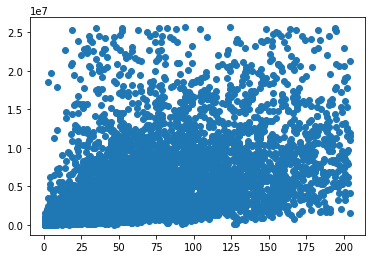

In [55]:
plt.scatter(df_trim['count'],df_trim['sum'])
plt.show()

C:\pythontemp\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sum', ylabel='Density'>

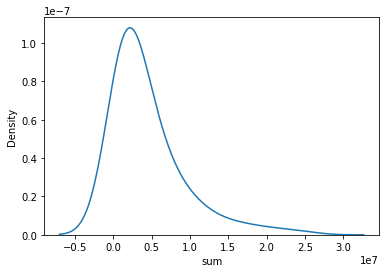

In [56]:
sns.kdeplot(df_trim['sum'],bw=0.5)

C:\pythontemp\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

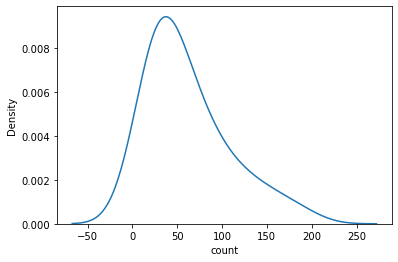

In [57]:
sns.kdeplot(df_trim['count'],bw=0.5)